<a href="https://colab.research.google.com/github/Imashish-45/Customer-Churn_prediction/blob/main/Sunbase_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **Introduction to Churn Prediction and Customer Retention**

Churn prediction and customer retention are critical aspects of business management, particularly in industries where customer relationships play a central role. Churn, often referred to as customer attrition, is the phenomenon where customers cease their engagement with a company's products or services. It represents a significant concern for businesses, as the loss of customers can result in reduced revenue and profitability.

Customer retention, on the other hand, is the proactive strategy employed by companies to keep their existing customers engaged and satisfied, ultimately preventing churn. It involves understanding customer behavior, preferences, and identifying factors that may lead to disengagement. By implementing effective retention strategies, businesses can not only maintain their customer base but also foster long-term relationships that drive growth and success.

Churn prediction, within the realm of data-driven decision-making, leverages historical customer data and machine learning techniques to forecast which customers are likely to churn in the future. By identifying early signs of potential churn, companies can take proactive measures to retain those customers, offering tailored incentives, improved services, or personalized communications.

In this Colab notebook, we delve into the fascinating world of churn prediction and customer retention. We will explore a real-world dataset, preprocess the data, engineer relevant features, build predictive models, and deploy a model capable of providing real-time churn predictions. The goal is not only to develop a high-performing model but also to emphasize the importance of customer-centric strategies in today's competitive business landscape.

Let's embark on this journey to uncover insights, make informed decisions, and empower businesses to retain their valuable customers effectively.

# **Problem Statement:**

Develop a machine learning model to predict customer churn based on historical customer data. You
will follow a typical machine learning project pipeline, from data preprocessing to model deployment.

In [1]:
# Importing important libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


# **Flow of the work:**





*  Data Loading and First look exploration
*  Exploratory Data Analysis
*  Feature engineering and Scaling
*  Variables spliting
*  Model Development
*  Pickling the required model and dependencies.
*  Model Deployment (VS code)





## Data loading and exploration:

In [2]:
df = pd.read_csv("/content/customer_churn_large_dataset.csv")

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [7]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [8]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [9]:
df.duplicated().sum()

0

# EDA

## Feature Distribution:

0    50221
1    49779
Name: Churn, dtype: int64


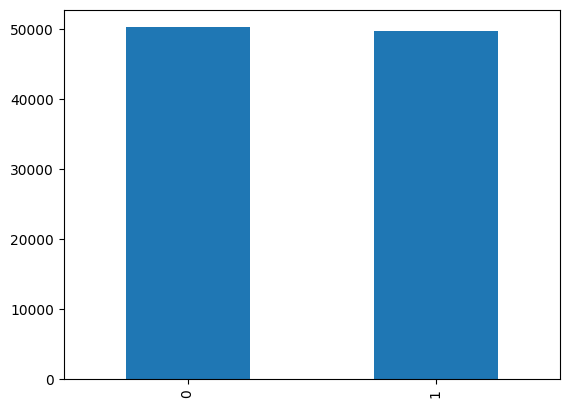

In [10]:
# Churn count:

color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["Churn"].map(lambda x: color_wheel.get(x + 1))
print(df.Churn.value_counts())
p=df.Churn.value_counts().plot(kind="bar")

## Inference: Churn data is almost perfectly balanced. hence, we dont need to handle class imbalance.

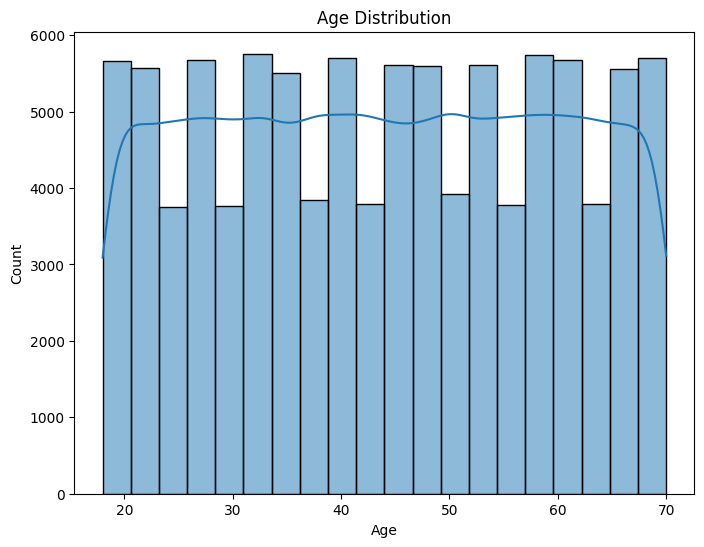

33    2046
50    1996
38    1970
63    1942
57    1942
Name: Age, dtype: int64


In [11]:
# Age distribution:


plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

print(df['Age'].value_counts().head())

Inference: Age feature is perfectly distributed.

Female    50216
Male      49784
Name: Gender, dtype: int64


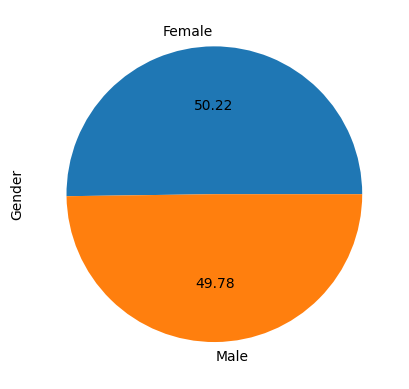

In [12]:
# Gender distribution:

df['Gender'].value_counts().plot(kind = "pie", autopct = "%.2f")

print(df['Gender'].value_counts())

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64


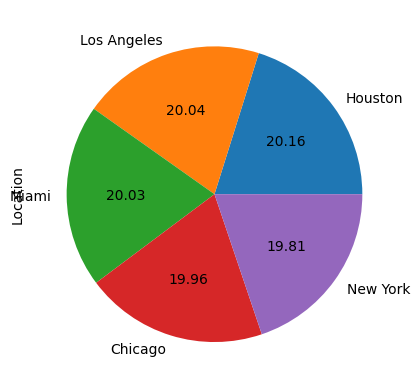

In [13]:
# location distribution:
df['Location'].value_counts().plot(kind = "pie", autopct = "%.2f")

print(df['Location'].value_counts())

<ipython-input-14-e5d8593ceba2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 0]['Monthly_Bill'], label='Not Churned', shade=True)
<ipython-input-14-e5d8593ceba2>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Churn'] == 1]['Monthly_Bill'], label='Churned', shade=True)


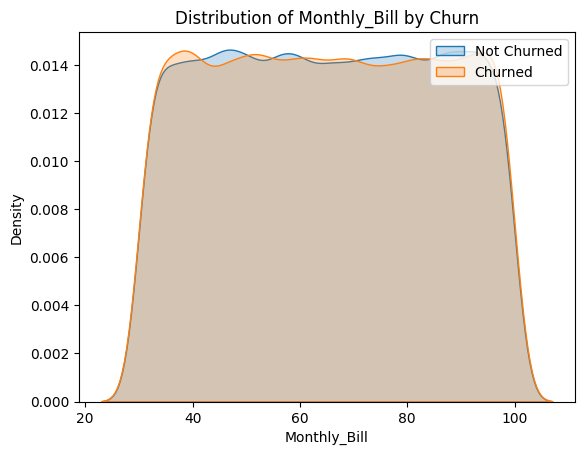

In [14]:
# distribution by Target class

# Example distribution plot of 'Monthly_Bill' by Churn
sns.kdeplot(df[df['Churn'] == 0]['Monthly_Bill'], label='Not Churned', shade=True)
sns.kdeplot(df[df['Churn'] == 1]['Monthly_Bill'], label='Churned', shade=True)
plt.xlabel('Monthly_Bill')
plt.ylabel('Density')
plt.title('Distribution of Monthly_Bill by Churn')
plt.legend()
plt.show()


## Feature correlation:

<ipython-input-15-7edc88e5f556>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


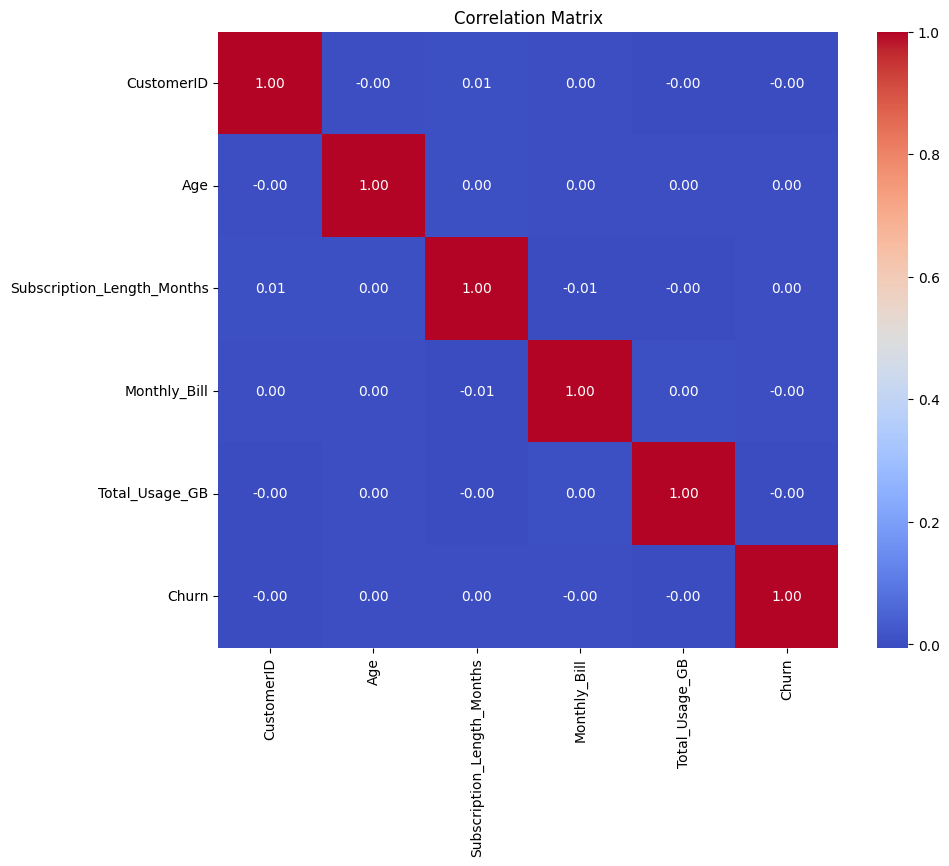

In [15]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Inference: No correlation, means There is no linear relationship between our features.

## Pairplot:

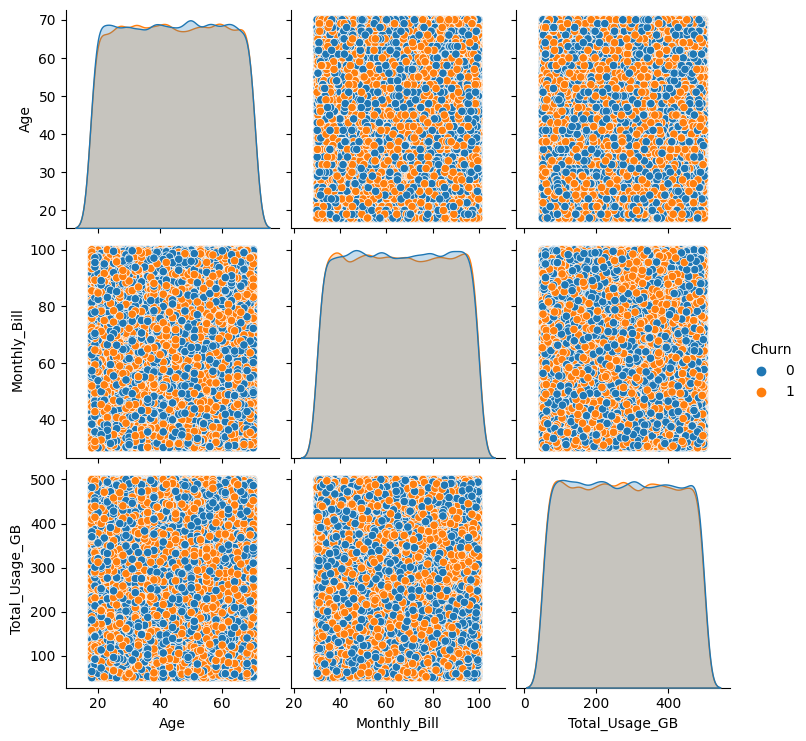

In [16]:
# Pairplot of numerical features
sns.pairplot(df[['Age', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']], hue='Churn')
plt.show()


## Outlier detection:

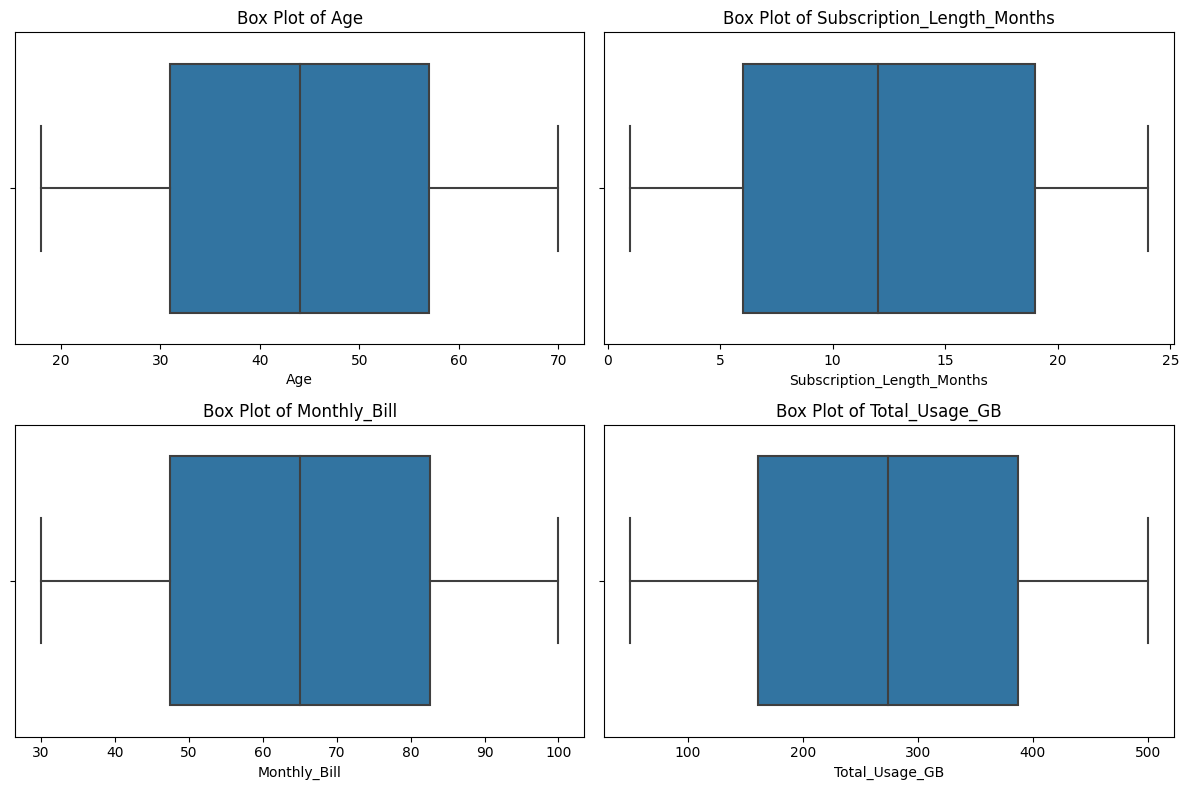

In [17]:

numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

## Inference: from the above visualization, we can conclude there is no outliers present in our data.

# **Key takeaways from the exploratory data analysis:**

•	The data is finely distributed.

•	There is no correlation between features.

•	Outliers are not present.


# FEATURE ENGINEERING:

In [18]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [19]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [20]:
# Dropping the unneccesary feature

df.drop(columns=['CustomerID', 'Name'], inplace=True)

# Encoding categorical variables:

In [22]:
import pickle

In [23]:
# Label Encoding for 'Gender' column


label_encoder = LabelEncoder()
df['Gender_Encoded'] = label_encoder.fit_transform(df['Gender'])

# Now let's save the encoders using pickle
with open('label_encoder.pkl', 'wb') as label_encoder_file:
    pickle.dump(label_encoder, label_encoder_file)

Note =

Female: 0
Male: 1

In [24]:
# One-Hot Encoding for 'Location' column
data = pd.get_dummies(df, columns=['Location'], prefix='Location', drop_first=False)


# Now let's save the one-hot encoder using pickle
with open('one_hot_encoder.pkl', 'wb') as one_hot_encoder_file:
    pickle.dump(data, one_hot_encoder_file)

In [25]:
#  dropping Original Gender column:

data.drop(columns=['Gender'], inplace=True)

Note: Assuming "Subscription_Length_Months" is the number of months the customer has been with us and paying monthly bills,.
We will create a new feature that will show the total amount paid by customer.

In [26]:
# Create a new feature: Amount_Paid
data['Amount_Paid'] = data['Subscription_Length_Months'] * data['Monthly_Bill']




Note: On the same assumption , we will create a new feature that will show Average GB usage per month by customer.

In [27]:
# Create a new feature: Usage_Per_Month
data['Usage_Per_Month'] = data['Total_Usage_GB'] / data['Subscription_Length_Months']




In [28]:
# Round the 'Usage_Per_Month' column to 2 decimal places and assign it back to the DataFrame
data['Usage_Per_Month'] = data['Usage_Per_Month'].round(2)

# Data exploration after feature Engineering:

In [29]:
data.shape

(100000, 13)

In [30]:
data.head()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Encoded,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Amount_Paid,Usage_Per_Month
0,63,17,73.36,236,0,1,0,0,1,0,0,1247.12,13.88
1,62,1,48.76,172,0,0,0,0,0,0,1,48.76,172.00
2,24,5,85.47,460,0,0,0,0,1,0,0,427.35,92.00
3,36,3,97.94,297,1,0,0,0,0,1,0,293.82,99.00
4,46,19,58.14,266,0,0,0,0,0,1,0,1104.66,14.00


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Subscription_Length_Months  100000 non-null  int64  
 2   Monthly_Bill                100000 non-null  float64
 3   Total_Usage_GB              100000 non-null  int64  
 4   Churn                       100000 non-null  int64  
 5   Gender_Encoded              100000 non-null  int64  
 6   Location_Chicago            100000 non-null  uint8  
 7   Location_Houston            100000 non-null  uint8  
 8   Location_Los Angeles        100000 non-null  uint8  
 9   Location_Miami              100000 non-null  uint8  
 10  Location_New York           100000 non-null  uint8  
 11  Amount_Paid                 100000 non-null  float64
 12  Usage_Per_Month             100000 non-null  float64
dtypes: float64(3), 

In [32]:
# features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

## Checking the distribution after feature engineering:

<ipython-input-33-3f71d333b904>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data[i].dropna(), color = 'black')
<ipython-input-33-3f71d333b904>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data[i].dropna(), color = 'black')
<ipython-input-33-3f71d333b904>:4: UserWarning: 

`d

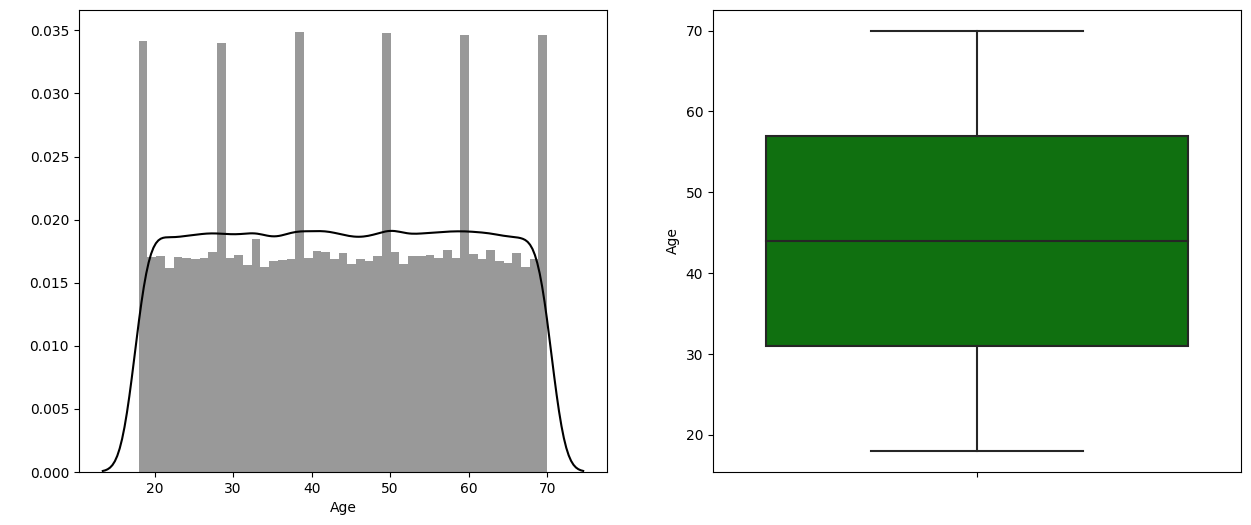

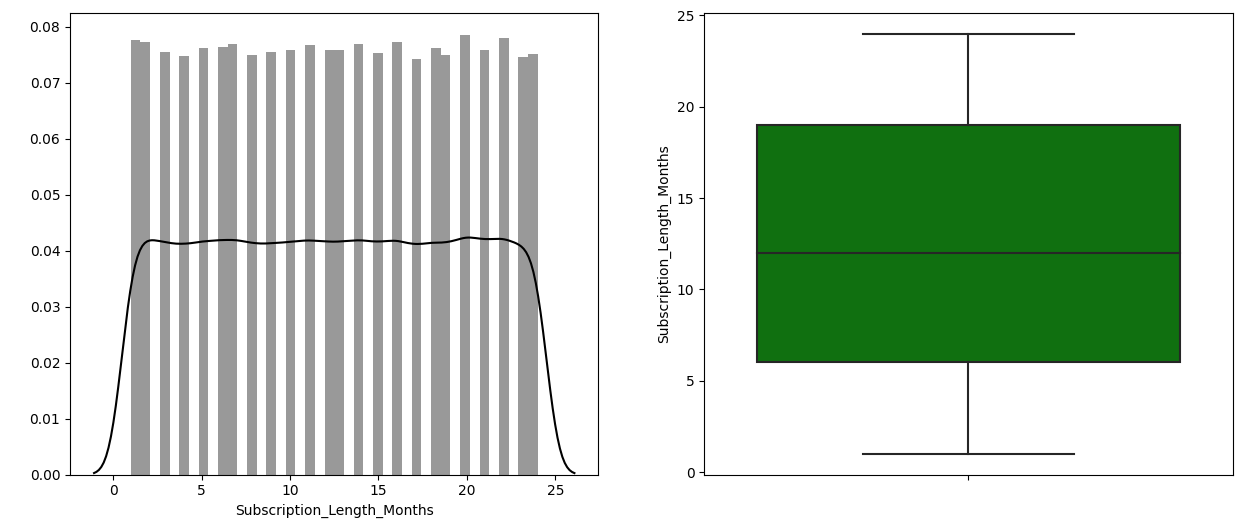

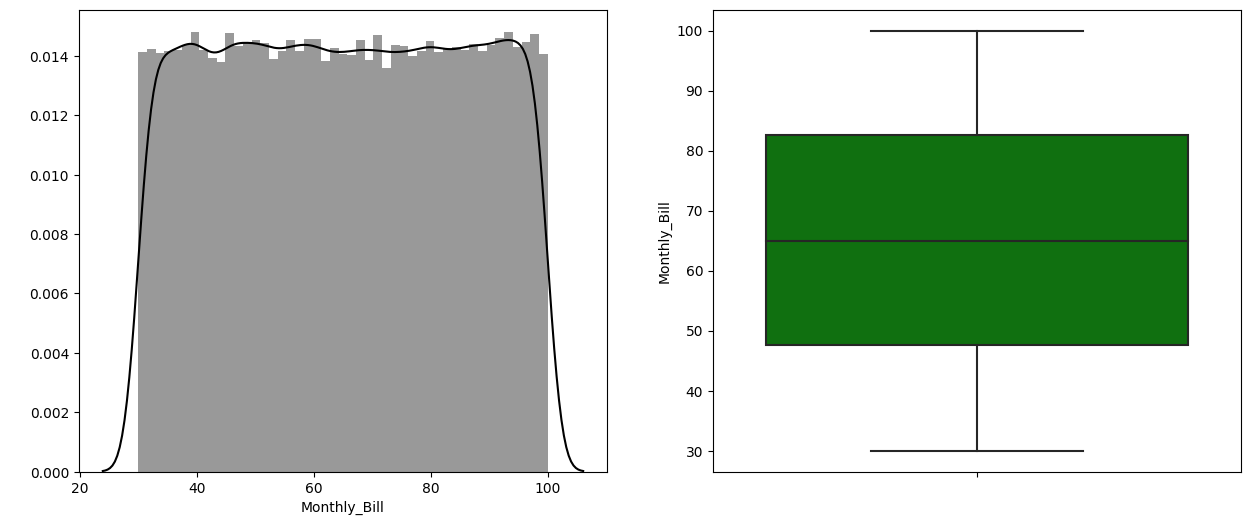

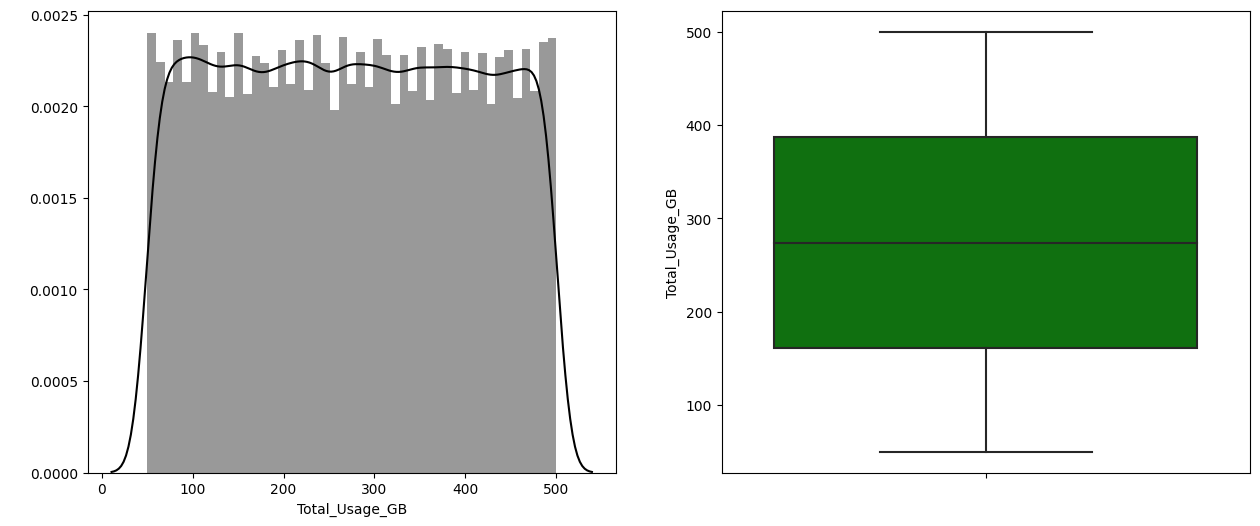

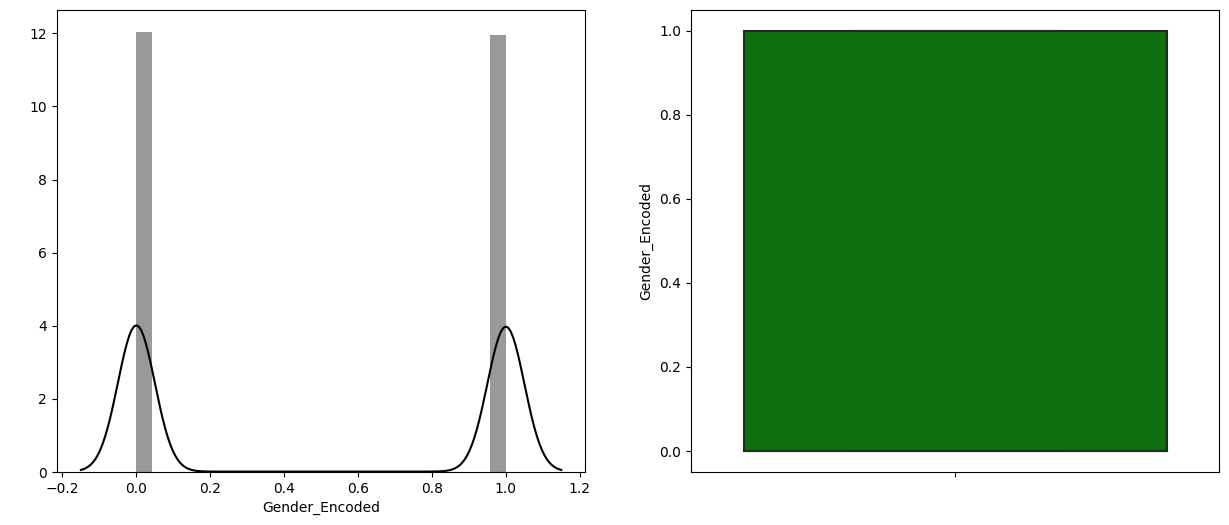

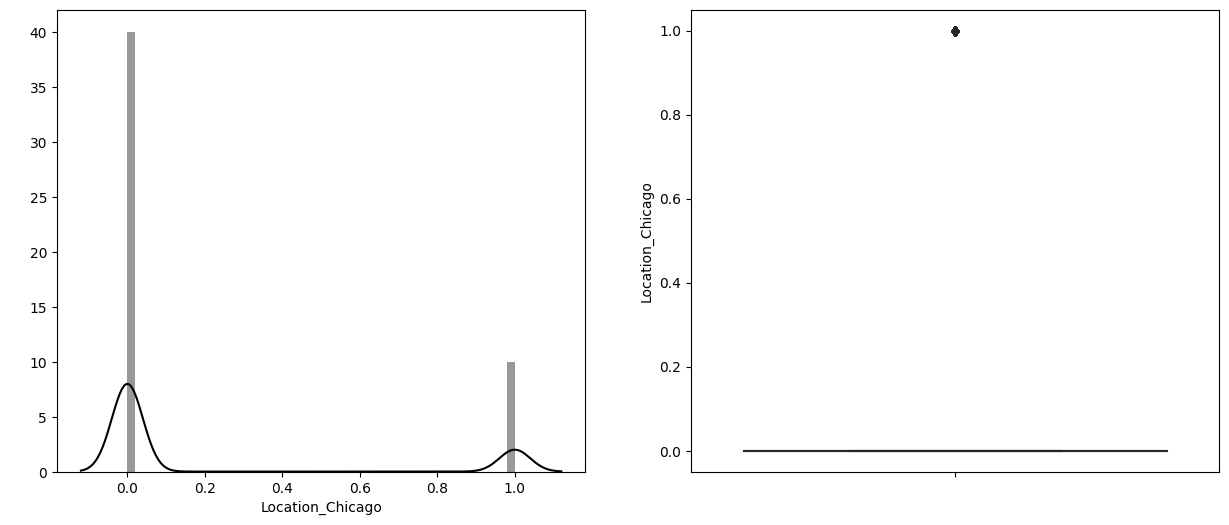

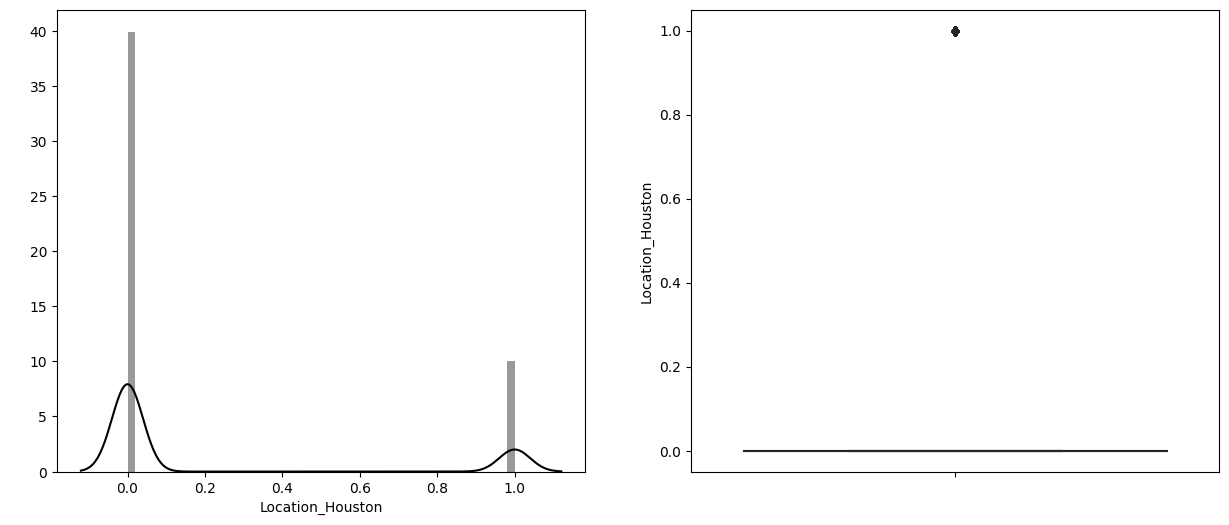

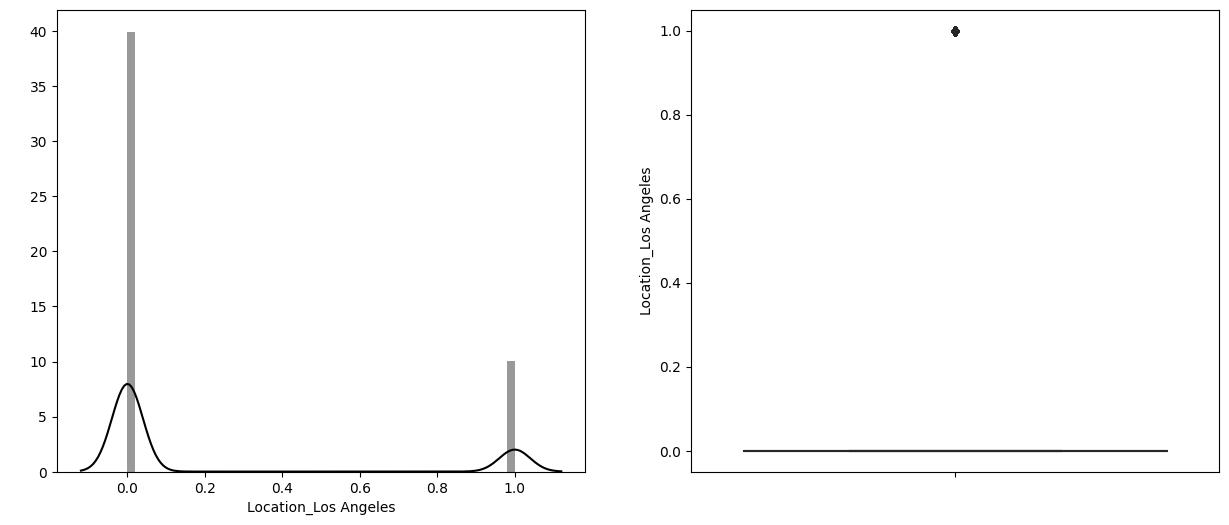

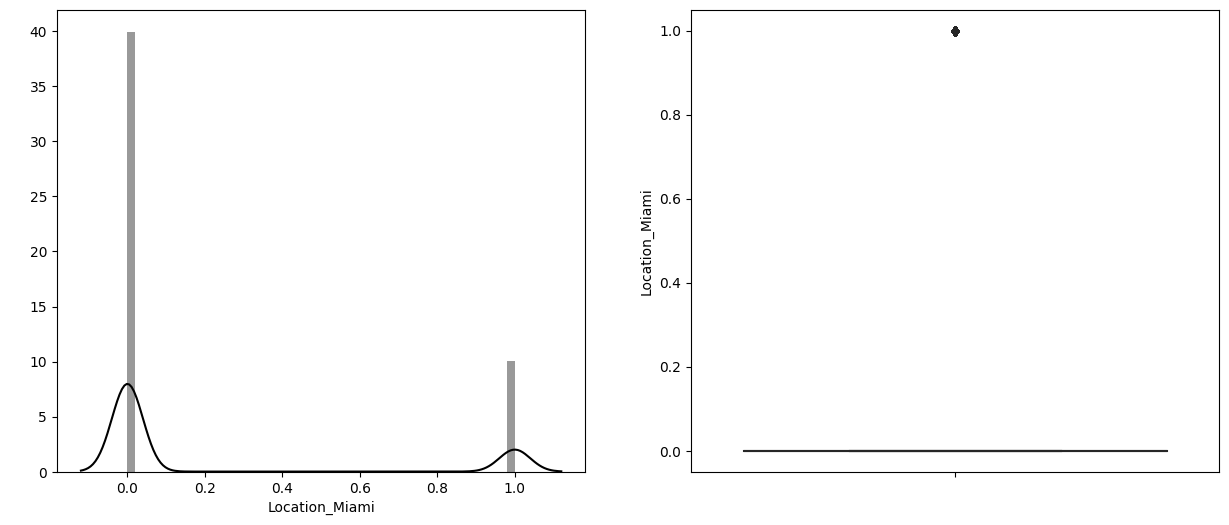

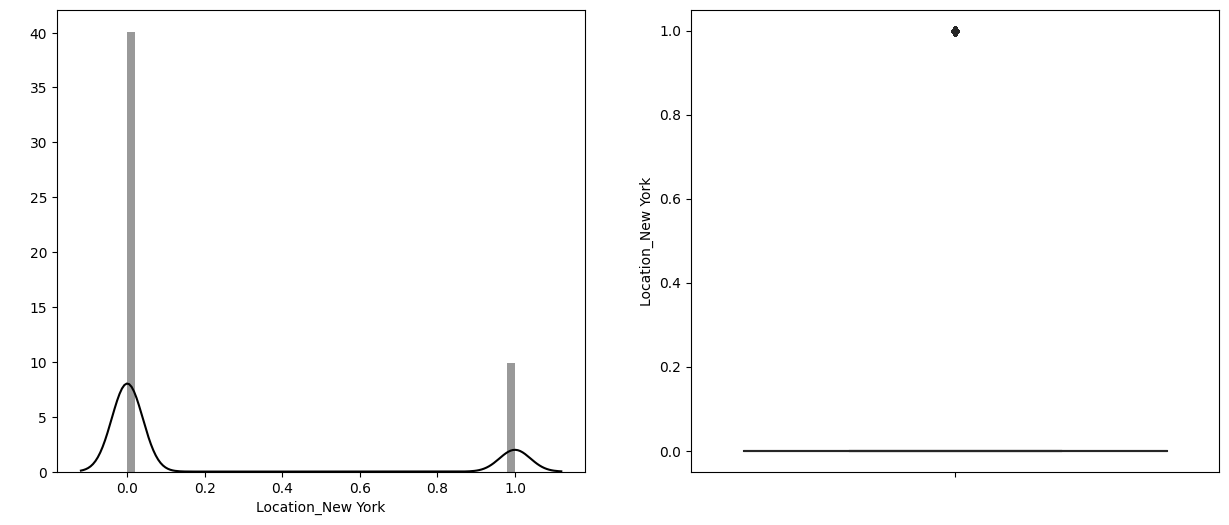

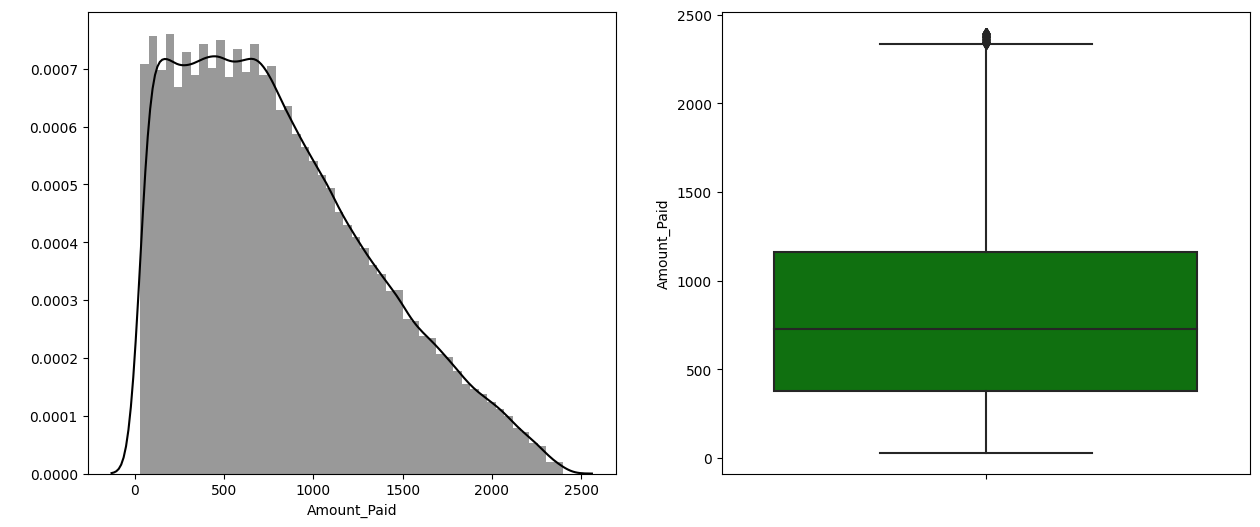

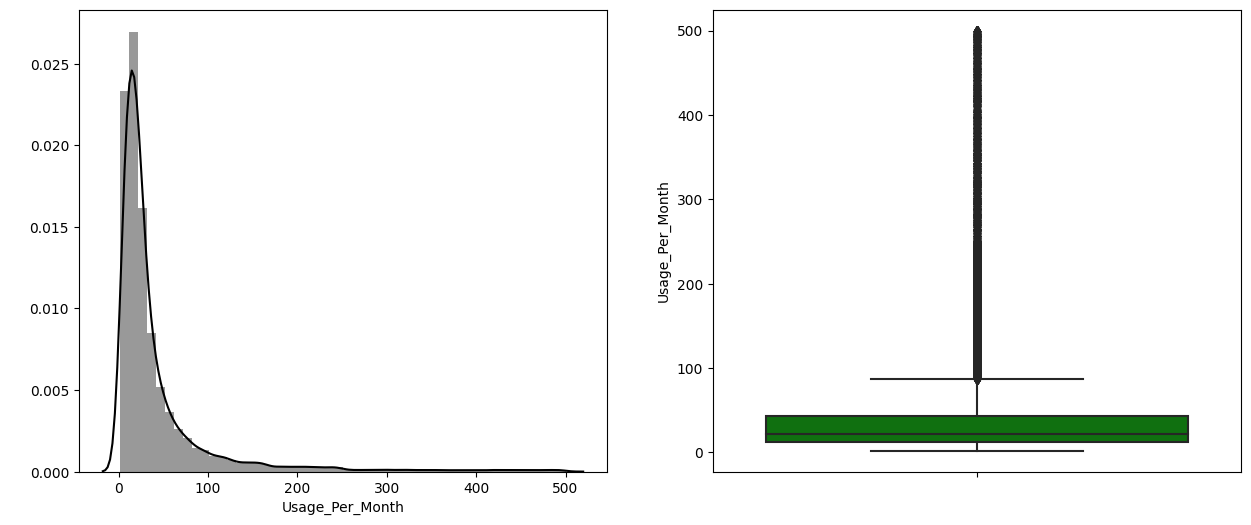

In [33]:
for i in X:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(data[i].dropna(), color = 'black')
    fig.set_ylabel(' ')
    fig.set_xlabel(i)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=data[i], color = 'green')
    fig.set_title('')
    fig.set_ylabel(i)

# Inference:
 The newly added two features that is Amount_paid and Usage_Per_Month is Positively Skewed and has outliers.
 We nedd to transform it before feeding it to our model.

## Transformation:

# Note: After several iterations of transformation, we observed that the best scenario is to follow separate transformations for each of the two features.

Amount_Paid will be treated with square root transformation.

Usage_Per_Month will be treated with Log10 transformation.

<ipython-input-34-488dfbbcc513>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(transformed_data, color='black')


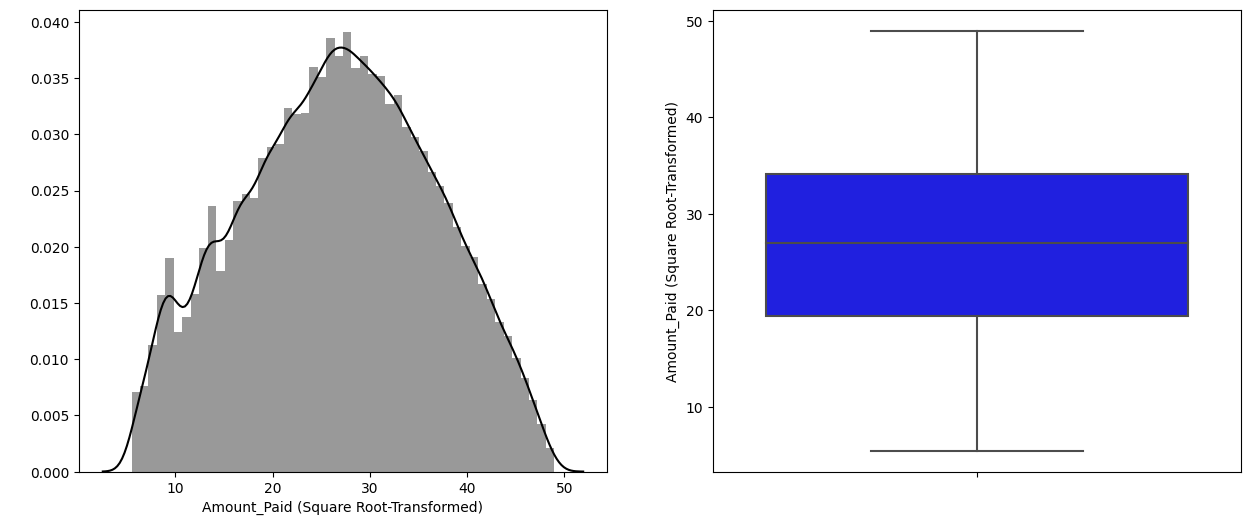

In [34]:
# Amount_Paid

# Specify the columns you want to transform
columns_to_transform = ['Amount_Paid']

for var in columns_to_transform:
    plt.figure(figsize=(15, 6))

    # Plot the distribution (square root-transformed) in the left subplot
    plt.subplot(1, 2, 1)
    transformed_data = np.sqrt(data[var])  # Apply square root transformation
    fig = sns.distplot(transformed_data, color='black')
    fig.set_ylabel(' ')
    fig.set_xlabel(var + ' (Square Root-Transformed)')

    # Plot the box plot of the transformed data in the right subplot
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=transformed_data, color='blue')
    fig.set_title('')
    fig.set_ylabel(var + ' (Square Root-Transformed)')

# Show the plots
plt.show()


<ipython-input-35-05090c4e1cdd>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(transformed_data, color='black')


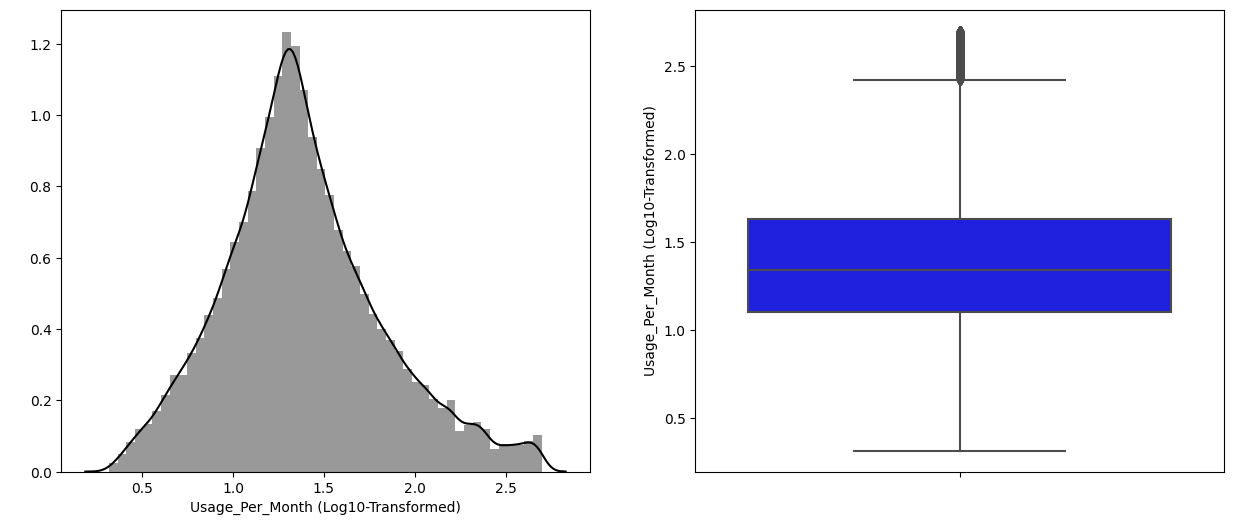

In [35]:
# Specify the columns we want to transform
columns_to_transform = ['Usage_Per_Month']

for var in columns_to_transform:
    plt.figure(figsize=(15, 6))

    # Plot the distribution (log10-transformed) in the left subplot
    plt.subplot(1, 2, 1)
    transformed_data = np.log10(data[var])  # Applying log10 transformation
    fig = sns.distplot(transformed_data, color='black')
    fig.set_ylabel(' ')
    fig.set_xlabel(var + ' (Log10-Transformed)')

    # Plot the box plot of the transformed data in the right subplot
    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=transformed_data, color='blue')
    fig.set_title('')
    fig.set_ylabel(var + ' (Log10-Transformed)')

# Show the plots
plt.show()

In [36]:
# Transformation in dataset

# Separate transformations for "Amount_Paid" and "Usage_Per_Month"
data['Amount_Paid'] = np.sqrt(data['Amount_Paid'])  # Square root transformation
data['Usage_Per_Month'] = np.log10(data['Usage_Per_Month'])  # Log10 transformation


# Rechecking the distribution:

<ipython-input-37-3f71d333b904>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data[i].dropna(), color = 'black')
<ipython-input-37-3f71d333b904>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  fig = sns.distplot(data[i].dropna(), color = 'black')
<ipython-input-37-3f71d333b904>:4: UserWarning: 

`d

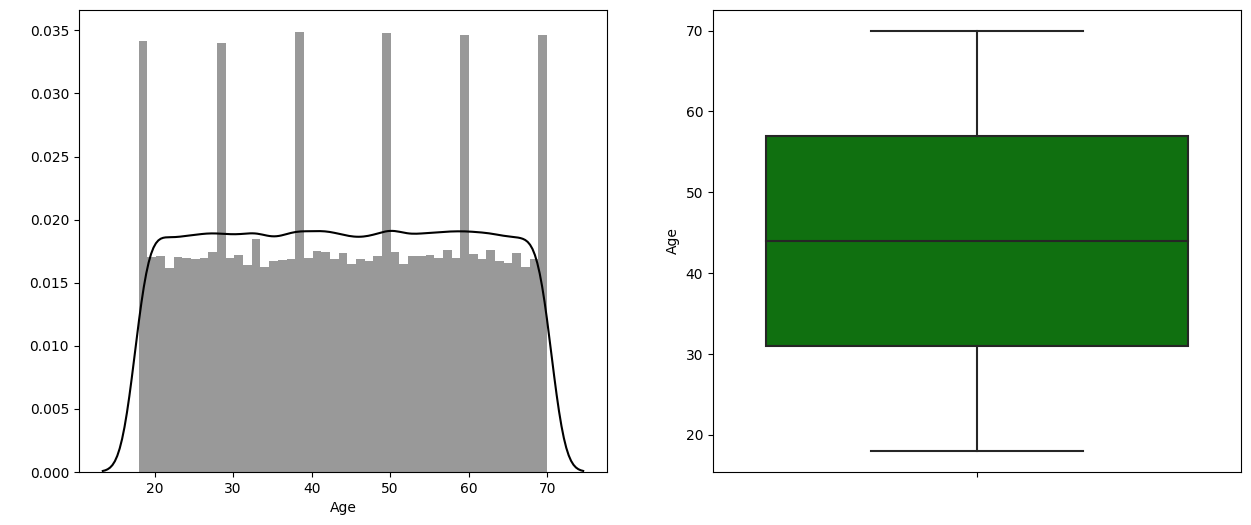

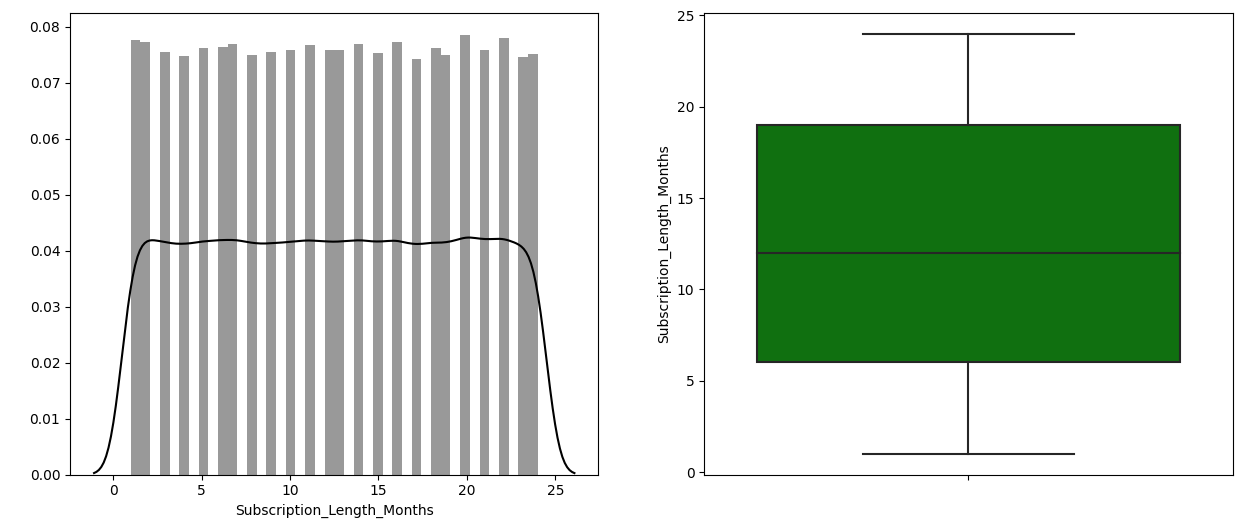

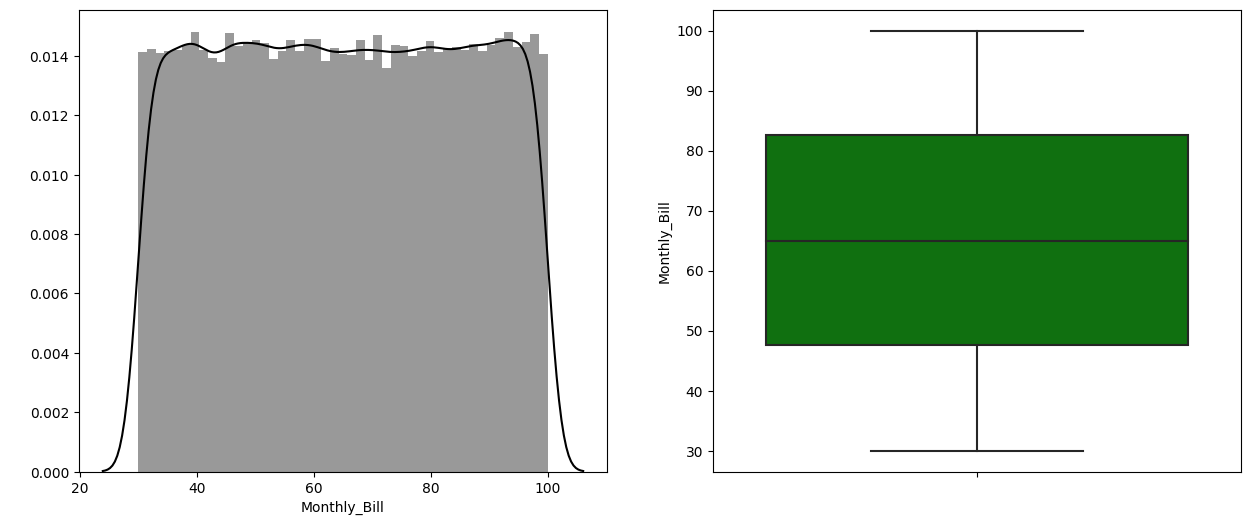

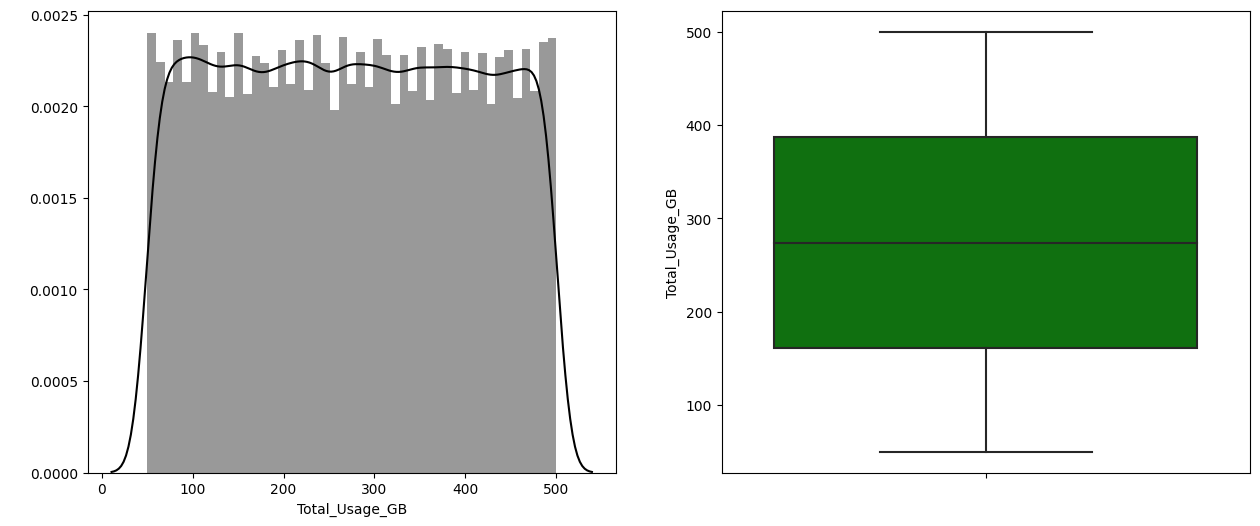

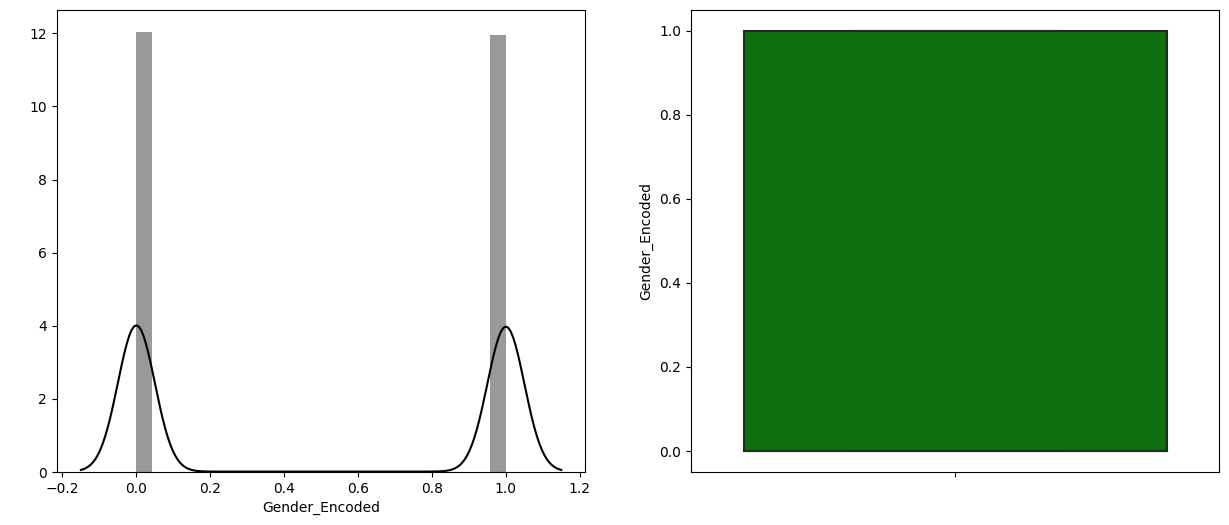

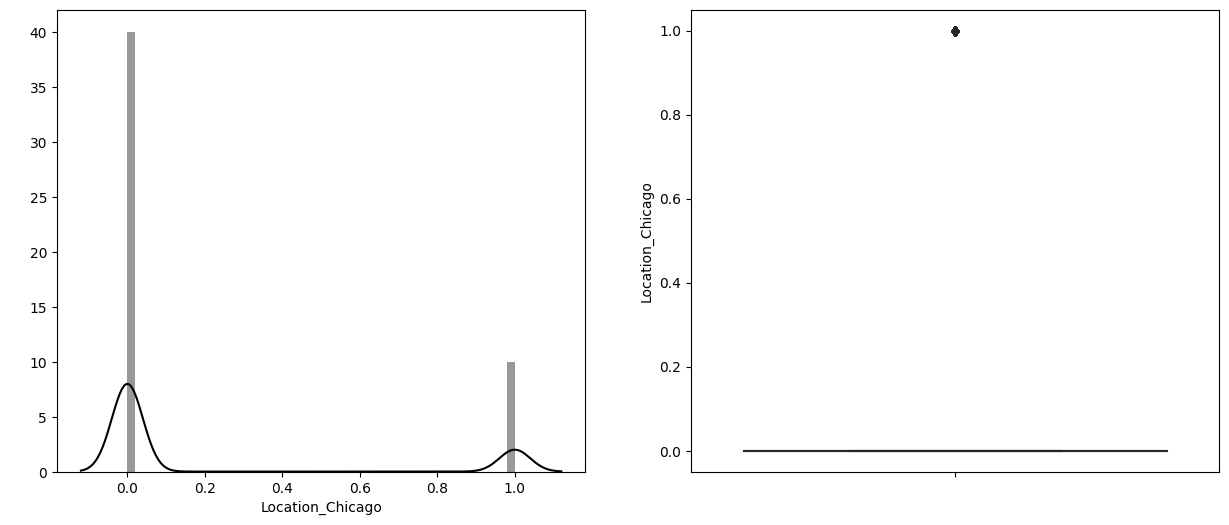

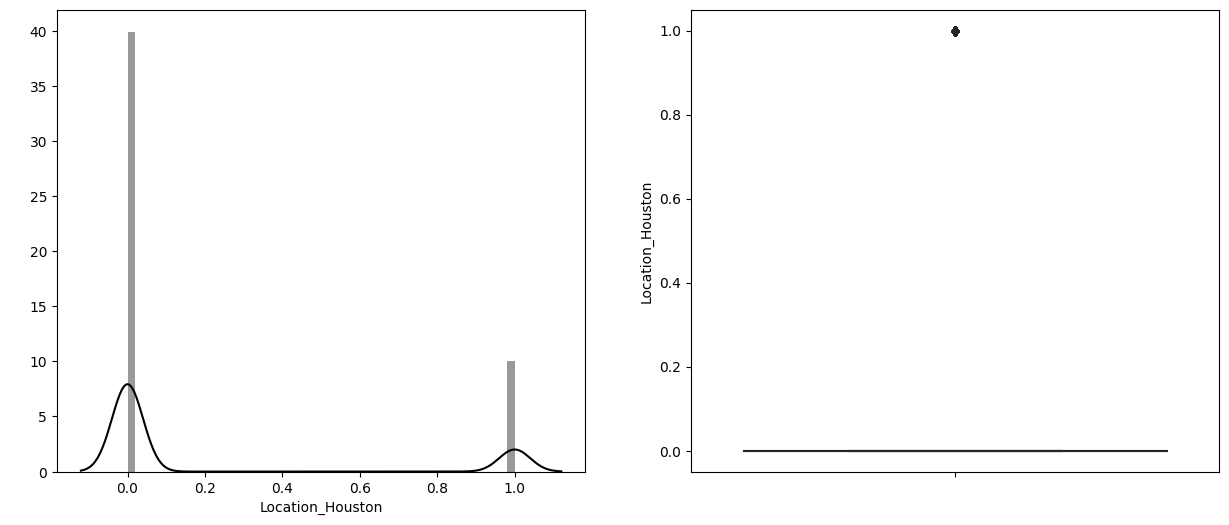

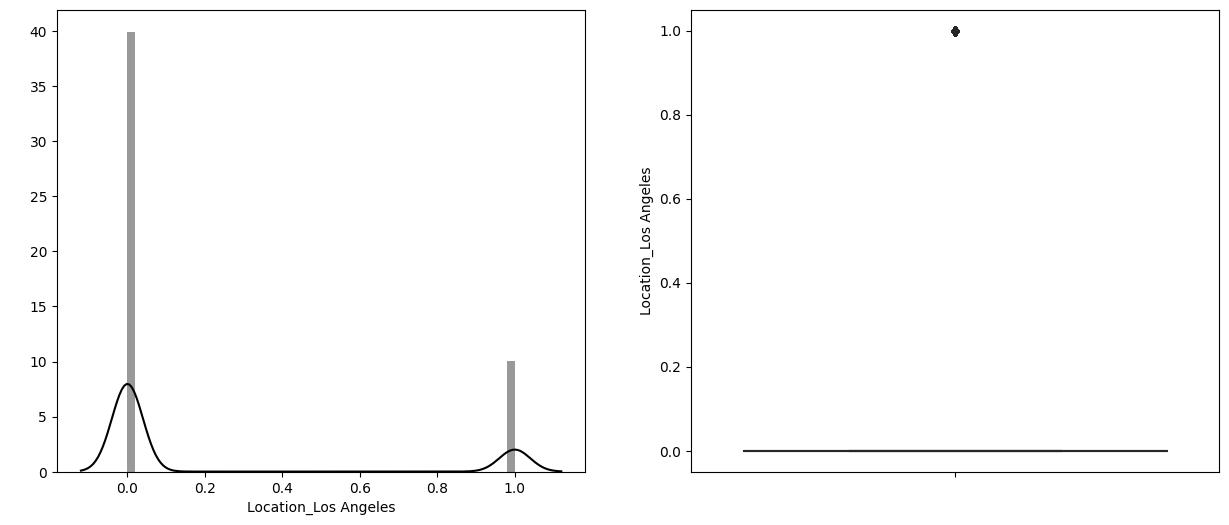

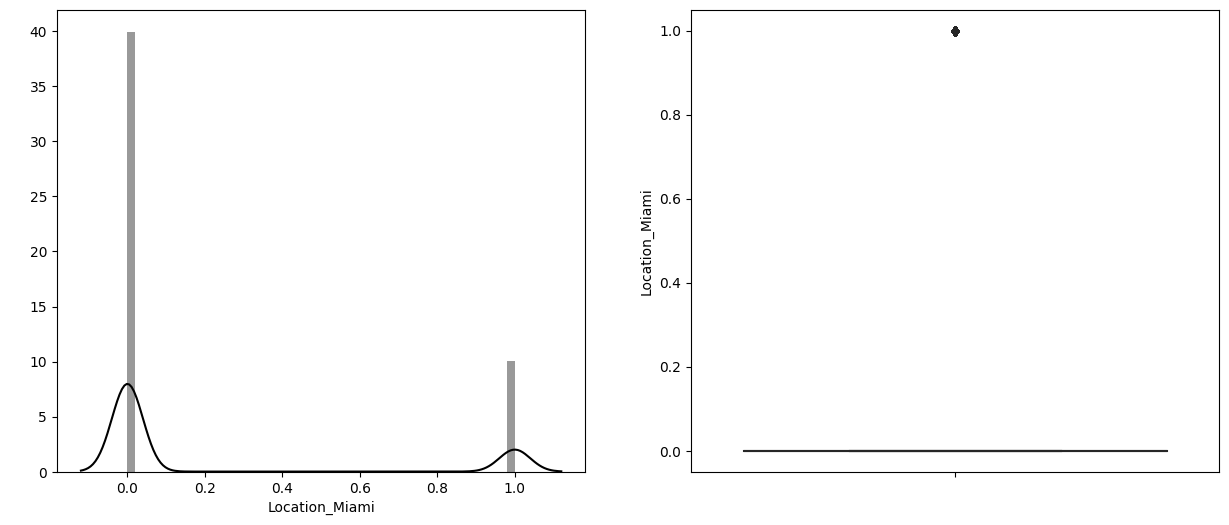

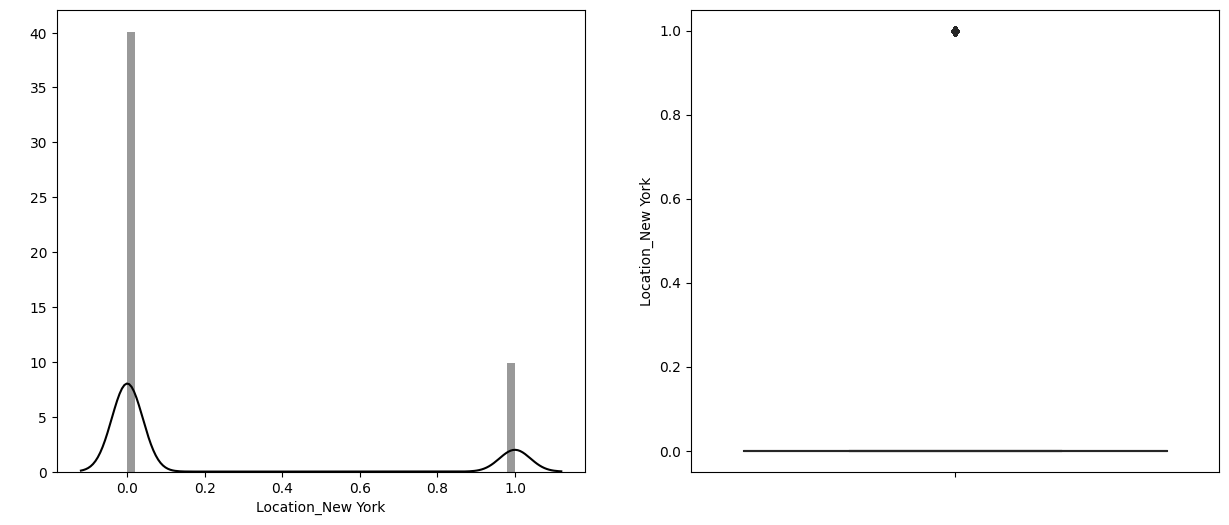

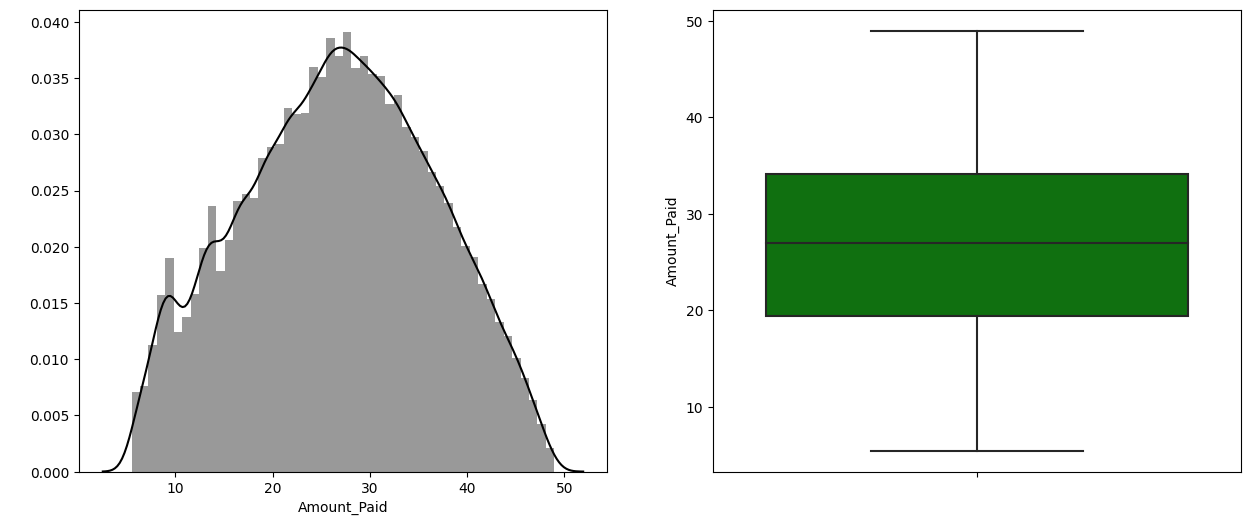

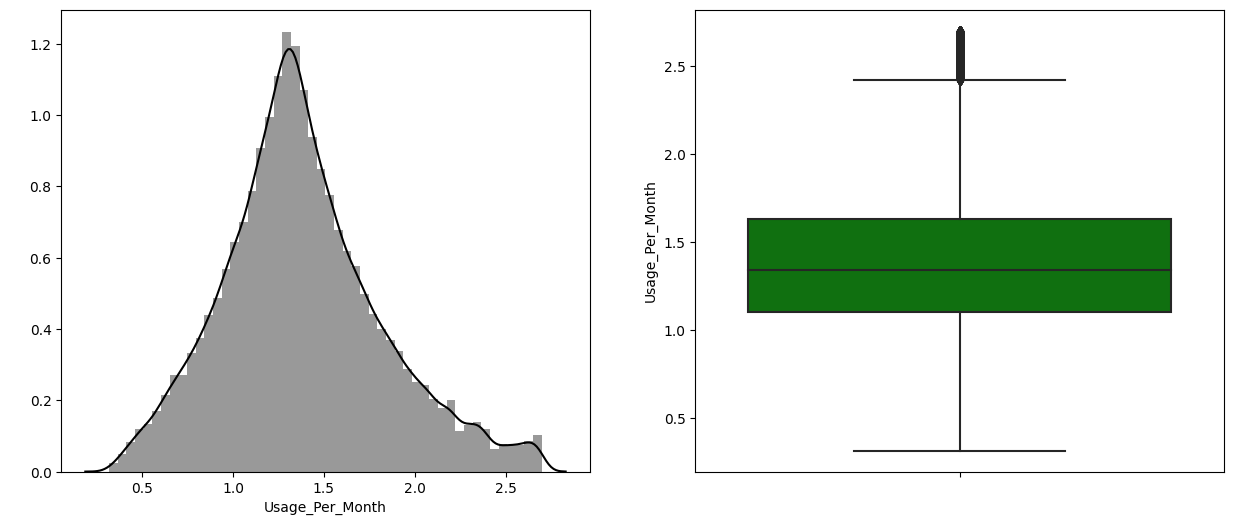

In [37]:
for i in X:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.distplot(data[i].dropna(), color = 'black')
    fig.set_ylabel(' ')
    fig.set_xlabel(i)

    plt.subplot(1, 2, 2)
    fig = sns.boxplot(y=data[i], color = 'green')
    fig.set_title('')
    fig.set_ylabel(i)

# Inference: The data looks finely distributed now, we can proceed ahead.

In [38]:
# Spliting the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [39]:
# shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 12)
X_test shape: (20000, 12)
y_train shape: (80000,)
y_test shape: (20000,)


## Feature Scaling:

In [40]:
# StandardScaler instance
scaler = StandardScaler()

# Fitting the scaler to our training data and transforming both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL DEVELOPMENT:

## Logistic Regression:

In [41]:
# Create a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model on the training data
logistic_model.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42)

In [42]:
# Make predictions on the testing data
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [43]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
recall = recall_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)





In [44]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.5036
Precision: 0.5034464475079533
Recall: 0.38056112224448896
F1-score: 0.4334626797534809


## Hyperparameter tunning:

In [96]:
# Define hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']              # Regularization penalty type
}

# Perform cross-validation with hyperparameter tuning
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [97]:
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2'}
Best Accuracy:  0.502


# XG Boost:

In [102]:
import pickle

In [45]:
# Create an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Save the trained XGBoost model to a file using pickle
model_filename = 'xgboost_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(xgb_model, model_file)

In [46]:

# Make predictions on the testing data
y_pred_xgb = xgb_model.predict(X_test_scaled)

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
classification_report_result = classification_report(y_test, y_pred_xgb)

In [48]:
# Print the evaluation results
print("XGBoost Model")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report_result)

XGBoost Model
Accuracy: 0.50525
Precision: 0.5044647547011241
Recall: 0.4811623246492986
F1-score: 0.4925380788758397
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.53      0.52     10020
           1       0.50      0.48      0.49      9980

    accuracy                           0.51     20000
   macro avg       0.51      0.51      0.50     20000
weighted avg       0.51      0.51      0.50     20000



In [100]:
# Define hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],       # Learning rate
    'max_depth': [3, 4, 5],                  # Maximum depth of trees
    'n_estimators': [50, 100],          # Number of boosting rounds
    'subsample': [0.8, 0.9, 1.0],            # Subsample ratio of the training data
}

# Perform cross-validation with hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Hyperparameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best Accuracy:  0.5036999999999999


In [86]:
# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can choose a different kernel if needed

# Train the model on the training data
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [87]:
# Make predictions on the testing data
y_pred_svm = svm_model.predict(X_test_scaled)

In [88]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
classification_report_result = classification_report(y_test, y_pred_svm)

In [89]:
# Print the evaluation results
print("Support Vector Machine (SVM) Model")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Classification Report:\n", classification_report_result)

Support Vector Machine (SVM) Model
Accuracy: 0.49555
Precision: 0.49336902299549823
Recall: 0.406312625250501
F1-score: 0.44562888070773116
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.58      0.54     10020
           1       0.49      0.41      0.45      9980

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.50      0.50      0.49     20000



# **ANN:**

In [82]:
# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])


In [83]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [84]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/50
1250/1250 [==============================] - 6s 4ms/step - loss: 0.7441 - accuracy: 0.4979 - val_loss: 0.6940 - val_accuracy: 0.4999
Epoch 2/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6945 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.5015
Epoch 3/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6942 - accuracy: 0.5007 - val_loss: 0.6935 - val_accuracy: 0.5013
Epoch 4/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4946
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6942 - accuracy: 0.5012 - val_loss: 0.6935 - val_accuracy: 0.5027
Epoch 6/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6941 - accuracy: 0.4993 - val_loss: 0.6939 - val_accuracy: 0.5016
Epoch 7/50
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6941 - accuracy: 0.4994 - val_loss: 0.6934 - val_accuracy:

In [85]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

625/625 [==============================] - 2s 4ms/step - loss: 0.6932 - accuracy: 0.5010
Test Accuracy: 50.10%


# **Cross-checking the Pickle file:**

In [49]:
file_name = 'xgboost_model.pkl'

In [50]:
load_model = pickle.load(open(file_name,'rb'))

In [51]:
load_model.score(X_test,y_test)

0.4983